In [5]:
import gym
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm

In [6]:
from julia.api import Julia
from julia import Main

jl = Julia(compiled_modules=True)
Main.include("q_learning_agent.jl")

<PyCall.jlwrap load_agent>

In [7]:
env = gym.make('CliffWalking-v0')

alpha, gamma, epsilon = 0.1, 0.95, 0.1

agent = Main.QLearningAgent(env, alpha, gamma, epsilon)

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:21<00:00, 99.36it/s]


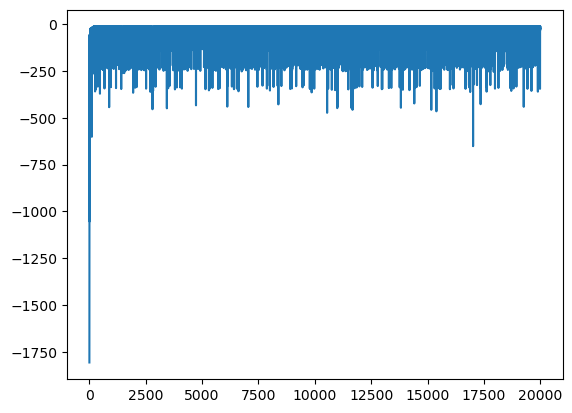

In [8]:
Q_Rewards = []

for episode in tqdm(range(20000)):
    episode_reward = 0
    state = env.reset()
    state = state[0] if isinstance(state, tuple) else state
    
    done = False
    while not done:
        action = Main.get_action(agent, state)
        
        next_state, reward, done, truncated, info = env.step(action)
        next_state = next_state[0] if isinstance(next_state, tuple) else next_state

                
        Main.update(agent, state, action, reward, next_state)
        
        state = next_state
        
        episode_reward += reward
    Q_Rewards.append(episode_reward)

Main.save(agent)
plt.plot(Q_Rewards)